# Introducción al paquete Scipy
El paquete **Scipy** es una colección de algoritmos y funciones construida sobre **Numpy** para facilitar cálculos y actividades relacionadas con el trabajo técnico/científico. 



## Una mirada rápida a Scipy

La ayuda de scipy contiene (con `help(scipy)` entre otras cosas)


    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     linalg.lapack                --- Wrappers to LAPACK library
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)
     spatial                      --- Spatial data structures and algorithms
     special                      --- Special functions
     stats                        --- Statistical Functions

     

Más información puede encontrarse en la [documentación oficial de Scipy](https://docs.scipy.org/doc/scipy/reference)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Funciones especiales

En el submódulo `scipy.special` están definidas un número de funciones especiales. Una lista general de las funciones definidas (De cada tipo hay varias funciones) es:

-  Airy functions
-  Elliptic Functions and Integrals
-  Bessel Functions
-  Struve Functions
-  Raw Statistical Functions
-  Information Theory Functions
-  Gamma and Related Functions
-  Error Function and Fresnel Integrals
-  Legendre Functions
-  Ellipsoidal Harmonics
-  Orthogonal polynomials
-  Hypergeometric Functions
-  Parabolic Cylinder Functions
-  Mathieu and Related Functions
-  Spheroidal Wave Functions
-  Kelvin Functions
-  Combinatorics
-  Other Special Functions
-  Convenience Functions



In [2]:
from scipy import special

### Funciones de Bessel
Las funciones de Bessel son soluciones de la ecuación diferencial:

$$ x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2)y = 0 . $$

En realidad se trata de una familia de funciones que aparecen como soluciones de problemas de propagación de ondas en problemas con simetría cilíndrica. 



In [3]:
special.jn_zeros(4,3)

array([  7.58834243,  11.06470949,  14.37253667])

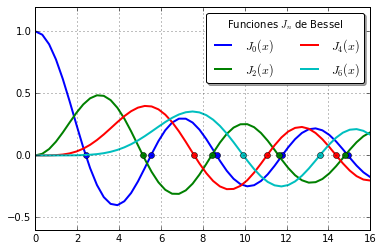

In [4]:
x = np.linspace(0, 16, 50)
for n in range(0,8,2):
  p= plt.plot(x, special.jn(n, x), label='$J_{}(x)$'.format(n))
  z = special.jn_zeros(n, 6)
  z = z[z < 15]
  plt.plot(z, np.zeros(z.size), 'o', color= p[0].get_color())

plt.legend(title='Funciones $J_n$ de Bessel', ncol=2);
plt.grid(True)

In [5]:
special.jn == special.jv

True

Como vemos, hay funciones para calcular funciones de Bessel. Aquí mostramos los órdenes enteros pero también se pueden utilizar órdenes $\nu$ reales. La lista de funciones de Bessel (puede obtenerse de la ayuda sobre `scipy.special`) es:

 - Bessel Functions
 - Zeros of Bessel Functions
 - Faster versions of common Bessel Functions
 - Integrals of Bessel Functions
 - Derivatives of Bessel Functions
 - Spherical Bessel Functions
 - Riccati-Bessel Functions



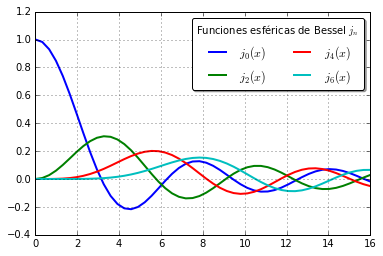

In [6]:
x = np.linspace(0, 16, 50)
for n in range(0,7,2):
  p= plt.plot(x, special.spherical_jn(n, x), label='$j_{}(x)$'.format(n))
plt.legend(title='Funciones esféricas de Bessel $j_n$', ncol=2);
plt.grid(True)

### Función Error

La función error es el resultado de integrar una función Gaussiana

$$ \operatorname{erf}z=\frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-t^{2}}\mathrm{d}t, $$

mientras que las integrales seno y coseno de Fresnel están definidas por:
\begin{align*}
\operatorname{ssa}= \int_{0}^{z} \sin(\pi/2  t^2) \mathrm{d} t \\
\operatorname{csa}= \int_{0}^{z} \cos(\pi/2  t^2) \mathrm{d} t 
\end{align*}

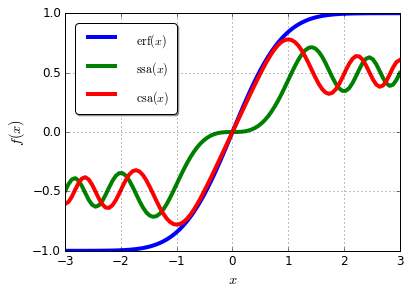

In [7]:
x = np.linspace(-3, 3,100)
with plt.style.context('presentation'):
  f = special.fresnel(x)
  plt.plot(x, special.erf(x),'-', label=r'$\mathrm{erf}(x)$')
  plt.plot(x, f[0],'-', label=r'$\mathrm{ssa}(x)$')
  plt.plot(x, f[1],'-', label=r'$\mathrm{csa}(x)$')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.legend(loc='best')
  plt.grid(True)

### Evaluación de polinomios ortogonales

`Scipy.special` tiene funciones para evaluar eficientemente polinomios ortogonales

Por ejemplo si queremos, evaluar los polinomios de Legendre, Laguerre y Chebyshev


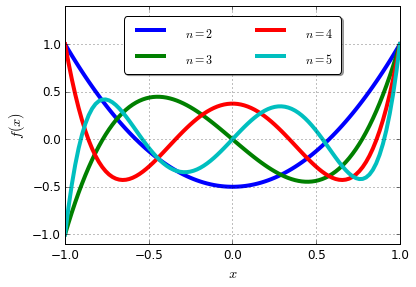

In [8]:
x = np.linspace(-1, 1,100)
with plt.style.context('presentation'):
  for n in range(2,6):
    plt.plot(x, special.eval_legendre(n, x),'-', label=r'$n={}$'.format(n))
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.legend(loc='best', ncol=2)
  plt.ylim((-1.1,1.4))
  plt.grid(True)

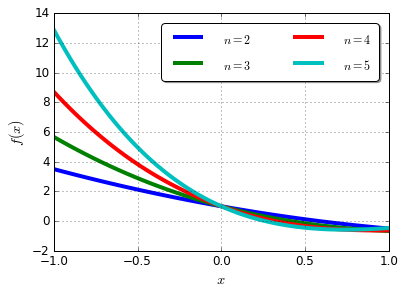

In [9]:
x = np.linspace(-1, 1,100)
with plt.style.context('presentation'):
  for n in range(2,6):
    plt.plot(x, special.eval_laguerre(n, x),'-', label=r'$n={}$'.format(n))
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.legend(loc='best', ncol=2)
  plt.grid(True)

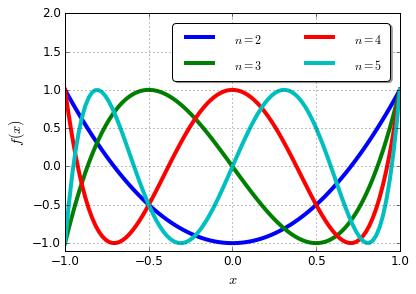

In [10]:
x = np.linspace(-1, 1,100)
with plt.style.context('presentation'):
  for n in range(2,6):
    plt.plot(x, special.eval_chebyt(n, x),'-', label=r'$n={}$'.format(n))
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.legend(loc='best', ncol=2)
  plt.ylim((-1.1,2))
  plt.grid(True)

### Factorial, permutaciones y combinaciones

Hay funciones para calcular varias funciones relacionadas con combinatoria

La función `comb()` da el número de maneras de elegir `k` de un total de `N` elementos. Sin repeticiones está dada por:
$$ \frac{N!}{k! (N-k)!}$$
mientras que si cada elemento puede repetirse, la fórmula es:
$$ \frac{(N+k-1)!}{k! (N-1)!}$$


In [11]:
N = 10
k =np.arange(2,4)

In [12]:
special.comb(N, k)

array([  45.,  120.])

In [13]:
special.comb(N,3,exact=True)

120

In [14]:
special.comb(N,k, repetition=True)

array([  55.,  220.])

El número de permutaciones se obtiene con la función `perm()`, y está dado por:
$$ \frac{N!}{(N-k)!}$$

In [15]:
special.perm(N,k)

array([  90.,  720.])

que corresponde a:
$$ \frac{10!}{(10-3)!} = 10 \cdot 9 \cdot 8 $$


Los números factorial (N!) y doble factorial (N!!) son:


In [16]:
N= np.array([3,6,8])
print("{}! = {}".format(N, special.factorial(N)))
print("{}!! = {}".format(N, special.factorial2(N)))

[3 6 8]! = [  6.00000000e+00   7.20000000e+02   4.03200000e+04]
[3 6 8]!! = [   3.   48.  384.]


## Integración numérica

Scipy tiene rutinas para integrar numéricamente funciones o tablas de datos. Por ejemplo para integrar funciones en la forma:
$$I= \int_{a}^{b} f(x)\, dx $$
la función más utilizada es `quad`, que llama a distintas rutinas del paquete **QUADPACK** dependiendo de los argumentos que toma. Entre los aspectos más notables está la posibilidad de elegir una función de peso entre un conjunto definido de funciones, y la posibilidad de elegir un dominio de integración finito o infinito.

In [17]:
from scipy import integrate

In [18]:
x = np.linspace(0., 10, 100)

In [19]:
def f1(x):
  return np.sin(1+x)*np.exp(-np.square(x)/10)

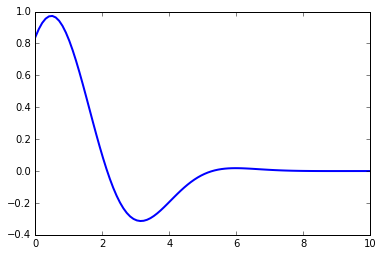

In [20]:
plt.plot(x,f1(x))

In [21]:
integrate.quad(f1,0,1)

(0.9251987327219345, 1.0271769354219079e-14)

In [22]:
[((0, xmax), integrate.quad(f1,0,xmax)[0]) for xmax in np.arange(1,5)]

[((0, 1), 0.9251987327219345),
 ((0, 2), 1.3968003526772008),
 ((0, 3), 1.2366051654989254),
 ((0, 4), 0.9615948227623313)]

Como vemos la rutina devuelve dos valores. El primero es la estimación del valor de la integral y el segundo una estimación del **error absoluto** . Además, la función acepta límites de integración infinitos ($\pm \infty$, definidos en **Numpy**)

In [23]:
integrate.quad(f1,-np.inf,np.inf)

(0.3871487639489564, 6.850562112670641e-09)

In [24]:
integrate.quad(np.sin,0,np.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

In [25]:
integrate.quad(np.exp,0,-1)

(-0.6321205588285578, 7.017947987503856e-15)

Podemos usar "toda" la potencia de Scipy para integrar alguna función especial. Como "jn" depende de dos variables, tenemos que crear una función intermedia que dependa sólo de la variable de integración

In [26]:
integrate.quad(lambda x: special.jn(0,x), 0 , 10)

(1.0670113039567362, 7.434789460651883e-14)

En realidad, la función `quad` permite el uso de argumentos que se le pasan a la función a integrar. La forma de llamar al integrador será en general:

```python
  quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)
  ```

El argumento `args` debe ser una tupla, de los argumentos extra que acepta la función a integrar, la función debe llamarse en la forma `func(x, *args)`. Veamos un ejemplo:

In [27]:
def bessel_n(x, n):
  return special.jn(n,x)

In [28]:
integrate.quad(bessel_n, 0, 10, args=(0,))

(1.0670113039567362, 7.434789460651883e-14)

In [29]:
print('n    \int_0^10  J_n(x) dx')
for n in range(6):
  print(n,': ', integrate.quad(bessel_n, 0, 10, args=(n,))[0])

n    \int_0^10  J_n(x) dx
0 :  1.0670113039567362
1 :  1.2459357644513482
2 :  0.9800658116190144
3 :  0.7366751370811073
4 :  0.8633070530086401
5 :  1.1758805092851239


## Álgebra lineal

El módulo de álgebra lineal se solapa un poco con las funciones de **Numpy**. Ambos usan finalmente una implementación de bibliotecas conocidas (LAPACK, BLAS). La diferencia es que **Scipy** asegura que utiliza las optimizaciones de la librería ATLAS y presenta algunos métodos y algoritmos que no están presentes en **Numpy**. 

Esto nos permite hacer rotaciones ...

![](https://imgs.xkcd.com/comics/matrix_transform.png)

In [30]:
from scipy import linalg

Este módulo tiene funciones para calcular determinantes

In [31]:
arr = np.array([[1, 2],[3, 4]])
linalg.det(arr)

-2.0

In [32]:
arr = np.array([[3, 2,1],[6, 4,1],[12, 8, 13.3]])
linalg.det(arr)

0.0

In [33]:
A = np.array([[1, -2,-3],[1, -1,-1],[-1, 3, 1]])
linalg.det(A)

-4.0

In [34]:
A.T                             # Transpuesta

array([[ 1,  1, -1],
       [-2, -1,  3],
       [-3, -1,  1]])

In [35]:
v = np.array([2,1,3])
linalg.norm(v)                  # Norma

3.7416573867739413

### Productos y normas

#### Norma de un vector

La norma está dada por
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$ 

In [36]:
linalg.norm(v) == np.sqrt(np.sum(np.square(v)))

True

#### Producto interno

El producto entre una matriz y un vector está definido en **Numpy** mediante la función `dot()`

In [37]:
w = np.dot(A, v)                # Multiplicación de matrices
w

array([-9, -2,  4])

El producto interno entre vectores se calcula de la misma manera
$$ \langle v, w \rangle$$

In [38]:
np.dot(v,w)

-8

y está relacionado con la norma
$$||v|| = \sqrt{ \langle v, v \rangle}$$

In [39]:
linalg.norm(v) == np.sqrt(np.dot(v,v))

True

In [40]:
np.dot(v,A)

array([ 0,  4, -4])

In [41]:
v.shape

(3,)

In [42]:
v2 = np.reshape(v, (3,1))

In [43]:
v2.shape

(3, 1)

In [44]:
np.dot(A, v2)

array([[-9],
       [-2],
       [ 4]])

In [45]:
v3=np.dot(v2.T, A)

In [46]:
v3.shape

(1, 3)

Notemos que el producto interno se puede pensar como un producto de matrices. En este caso, el producto de una matriz de 3x1, por otra de 1x3:

$$ v^{t} \, w = \begin{pmatrix} -9&-2&4 \end{pmatrix} \begin{pmatrix} 2\\1\\3 \end{pmatrix} $$

donde estamos pensando al vector como columna.

#### Producto exterior

El producto exterior puede ponerse en términos de multiplicación de matrices como
$$v\otimes w = vw^{t} = \begin{pmatrix} -9\\-2\\4 \end{pmatrix} \begin{pmatrix} 2&1&3 \end{pmatrix}$$

In [47]:
oprod = np.outer(v,w)
print(oprod)

[[-18  -4   8]
 [ -9  -2   4]
 [-27  -6  12]]


### Determinantes, inversas

El modulo `scipy.linalg` permite obtener determinantes e inversas de matrices. Veamos su uso

####  Aplicación: Sistema de ecuaciones lineales

Dado un problema de ecuaciones lineales:
$$
\left\{
\begin{array}{rl}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 &= b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 &= b_2 \\
a_{31} x_1 + a_{32} x_2 + a_{33} x_3 &= b_3
\end{array}
\right.
$$
Esta ecuación se puede escribir en forma matricial como
$$ \begin{pmatrix}a_{11}&a_{12} & a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} = \begin{pmatrix}b_1\\b_2\\b_3\end{pmatrix}
$$

Veamos un ejemplo concreto. Supongamos que tenemos el siguiente sistema
$$
\left\{
\begin{array}{rl}
 x_1 + 2 x_2 + 3 x_3 &= 1 \\
2 x_1 +  x_2 + 3 x_3 &= 2 \\
4 x_1 +  x_2 - x_3 &= 1
\end{array}
\right.
$$
por lo que, en forma matricial será:
$$ A = \begin{pmatrix} 1 &2 &3 \\ 2& 1& 3 \\ 4& 1& -1 \end{pmatrix} $$
y 
$$ b =  \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} $$

In [48]:
A = np.array([[1,2,3],[2,1,3],[4,1,-1]])
b = np.array([[1,2,3]]).T
print('A=', A,"\n")
print('b=', b,"\n")

A= [[ 1  2  3]
 [ 2  1  3]
 [ 4  1 -1]] 

b= [[1]
 [2]
 [3]] 



In [49]:
x = np.dot(linalg.inv(A), b)
print('Resultado:\n', x)

Resultado:
 [[ 0.83333333]
 [-0.16666667]
 [ 0.16666667]]


### Descomposición de matrices
Si consideramos el mismo problema de resolución de ecuaciones
$$A x = b $$
pero donde debemos resolver el problema para un valor dado de los coeficientes (la matriz $A$) y muchos valores distintos del vector $b$, suele ser útil realizar lo que se llama la descompocición $LU$ de la matriz.

Si escribimos a la matriz $A$ como el producto de dos matrices $A = LU$ donde $L$ es una matriz triangular inferior (Los elementos por encima de la diagonal son nulos) y $U$ una triangular superior, podemos resolver el sistema en dos pasos:

$$ Ly=b $$ 
con
$$ y = Ux. $$

En ese caso, resolvemos una sola vez la descompocición $LU$, y luego ambas ecuaciones se pueden resolver eficientemente debido a la forma de las matrices.

In [50]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])

print('A=', A,"\n")

P, L, U = linalg.lu(A)
print("LU=", np.dot(L, U))
print("\nL=",L)
print("\nU=", U)

A= [[1 3 4]
 [2 1 3]
 [4 1 2]] 

LU= [[ 4.  1.  2.]
 [ 1.  3.  4.]
 [ 2.  1.  3.]]

L= [[ 1.          0.          0.        ]
 [ 0.25        1.          0.        ]
 [ 0.5         0.18181818  1.        ]]

U= [[ 4.          1.          2.        ]
 [ 0.          2.75        3.5       ]
 [ 0.          0.          1.36363636]]


### Autovalores y autovectores
La necesidad de encontrar los autovalores y autovectores de una matriz aparece en muchos problemas de física e ingeniería. Se trata de encontrar el escalar $\lambda$ y el vector (no nulo) $v$ tales que

$$ A v = \lambda v$$



In [51]:
B = np.array([[0,1,1],[2,1,0], [3,4,5]])
print(B)
u, v = linalg.eig(B)
print('')
print(np.dot(v,np.dot(np.diag(u), linalg.inv(v))))
print(np.real_if_close(np.dot(v,np.dot(np.diag(u), linalg.inv(v)))))
print('')
print(u)
print(np.real_if_close(u))


[[0 1 1]
 [2 1 0]
 [3 4 5]]

[[ -1.89222052e-16+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j]
 [  2.00000000e+00+0.j   1.00000000e+00+0.j   3.05311332e-16+0.j]
 [  3.00000000e+00+0.j   4.00000000e+00+0.j   5.00000000e+00+0.j]]
[[ -1.89222052e-16   1.00000000e+00   1.00000000e+00]
 [  2.00000000e+00   1.00000000e+00   3.05311332e-16]
 [  3.00000000e+00   4.00000000e+00   5.00000000e+00]]

[ 5.85410197+0.j -0.85410197+0.j  1.00000000+0.j]
[ 5.85410197 -0.85410197  1.        ]


Veamos como funciona para la matriz definida anteriormente

In [52]:
print(A)
u, v = linalg.eig(A)
print(np.real_if_close(np.dot(v,np.dot(np.diag(u), linalg.inv(v)))))
print(np.real_if_close(u))

[[1 3 4]
 [2 1 3]
 [4 1 2]]
[[ 1.  3.  4.]
 [ 2.  1.  3.]
 [ 4.  1.  2.]]
[ 7.10977223 -2.10977223 -1.        ]


### Rutinas de resolución de ecuaciones lineales

**Scipy** tiene además de las rutinas de trabajo con matrices, rutinas de resolución de sistemas de ecuaciones. En particular la función `solve()`

 solve(a, b, sym_pos=False, lower=False, overwrite_a=False, overwrite_b=False,
       debug=False, check_finite=True)

Solve the equation ``a x = b`` for ``x``.

Parameters
----------
a : (M, M) array_like
    A square matrix.
b : (M,) or (M, N) array_like
    Right-hand side matrix in ``a x = b``.
...

In [53]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [54]:
np.allclose(np.dot(a, x) , b)

True

In [55]:
np.dot(a,x) == b

array([False,  True,  True], dtype=bool)

Para sistemas de ecuaciones grandes, la función `solve()` es más rápida que invertir la matriz

In [56]:
A1 = np.random.random((1000,1000))
b1 = np.random.random(1000)

In [57]:
%timeit linalg.solve(A1,b1)

10 loops, best of 3: 91.5 ms per loop


In [58]:
%timeit np.dot(linalg.inv(A1),b1)

1 loops, best of 3: 284 ms per loop


## Procesamiento simple de imágenes

Si bien scipy tiene un submódulo scipy.ndimage que permite trabajar con imágenes en forma más o menos sofisticada. Algún procesamiento simple se obtiene de las funciones en scipy.misc

In [59]:
ls figuras/

08_img1.png             logos.png
axes_demo.png           matplotlib_logo.png
bsplinebasics.png       mayavi-samp.png
bsplines.png            mayavi-streamlines.jpg
Buffon_needle_wiki.png  mpl_advanced_hillshading_01.png
canopy-cluster.png      numpy_broadcasting.png
CanopyWindow.png        numpy_indexing_large.png
console.png             numpy_indexing.png
curvas_log.png          numpy_logo.png
diagrama_tof.png        polar_legend.png
ecosistema1.png         pymol_example1.png
ecosistema2.png         pymol_example2.png
ejercicio_08_1.png      python-arduino.png
ejercicio_08_2.png      python-logo.png
ejercicio_08_3.png      pyvisa.png
ejercicio_09_1.png      raspberry_book.jpg
example_stats.png       retorno_figs_1.png
galeria_mayavi.png      Schlieren-color-candle-plume.jpg
HarmOsziFunktionen.png  scipy_logo.png
imagen_flujo.jpg        simple_linea.png
imagen_flujo.png        simple_linea_simb.png
index_slicing.png       simple_varios.png
IPy_logo.png            spyder-hd.png
ipython

In [60]:
lena=misc.imread('figuras/08_img1.png')

NameError: name 'misc' is not defined

In [ ]:
from scipy import misc

lena= misc.face()
plt.imshow(lena, cmap='gray')

In [ ]:
plt.imshow(misc.imrotate(lena,90))

In [ ]:
print(lena)

In [ ]:
type(lena), lena.shape

In [ ]:
lena[10:12,40:42]

In [ ]:
plt.imshow(lena)

Al ser la imagen un "simples" `array` en dos dimensiones podemos realizar operaciones. Por ejemplo *clip*

In [ ]:
plt.imshow(lena[0:400, 400:800, 2], cmap='gray')

In [ ]:
lena.min(),lena.max()

In [ ]:
plt.imshow(np.where(lena > 120, 255, lena))

In [ ]:
plt.imshow(np.where(lena < 85, 0, lena))

In [ ]:
plt.imshow(np.where((lena > 85) & (lena < 170) , 150, lena))

Podemos degradar la imagen dando redondeando los valores

In [ ]:
plt.imshow(lena*2)

In [ ]:
np.max(lena)

## Entrada y salida 

El submódulo `io` tiene algunas utilidades de entrada y salida de datos que permite interactuar con otros paquetes/programas. Algunos de ellos son:

- Archivos IDL ![Interactive Data Language](https://hesperia.gsfc.nasa.gov/hessi/solar_cd/FAQ/IDL_FAQ.htm)
   - `scipy.io.readsav()`

- Archivos de sonido wav, con `scipy.io.wavfile`
   - `scipy.io.wavfile.read()`
   - `scipy.io.wavfile.write()`

- Archivos fortran sin formato, con `scipy.io.FortranFile`

- Archivos Netcdf (para gran número de datos), con  `scipy.io.netcdf`

- Archivos de matrices de Matlab

In [ ]:
from scipy import io as sio
a = np.ones((3, 3)) + np.eye(3,3)
print(a)
sio.savemat('datos.mat', {'a': a}) # savemat espera un diccionario
data = sio.loadmat('datos.mat', struct_as_record=True)
data['a']

In [ ]:
data